In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [65]:
# Import API key
from api_key import weather_api_key

In [66]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [67]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [68]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lat_range = (-180, 180)

# Generate Cities List

In [69]:
# Create a set of random lat and lng combinations
lat_lngs = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [70]:
# Identify nearest city for each lat, lng combination
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
         cities.append(city)            
# cities

# Perform API Calls

In [71]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url

In [72]:
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []

wind_speed = []
date = []
country = []
city_name = []

not_located = []
except_set = 1

print('Beginning Data Rerieval')
print('-----------------------')

for index, city in enumerate(cities, start=1):
    try:
        
        response = requests.get(query_url + city).json()
        # Request will be pause for 2 seconds   
        time.sleep(2)
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        city_name.append(city)
        print(f'Processing Record {index} of Set {except_set} | {city}')
        
    except:
        
        not_located.append(city)
        print(f"city({city}) not found")
        except_set+= 1
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')


Beginning Data Rerieval
-----------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | tirumullaivasal
Processing Record 3 of Set 1 | vaini
city(amderma) not found
Processing Record 5 of Set 2 | ribeira grande
Processing Record 6 of Set 2 | hermanus
Processing Record 7 of Set 2 | sioux lookout
Processing Record 8 of Set 2 | tuktoyaktuk
Processing Record 9 of Set 2 | raudeberg
Processing Record 10 of Set 2 | pevek
Processing Record 11 of Set 2 | campo maior
Processing Record 12 of Set 2 | oktyabrskoye
Processing Record 13 of Set 2 | punta arenas
Processing Record 14 of Set 2 | bambous virieux
Processing Record 15 of Set 2 | husavik
Processing Record 16 of Set 2 | kahului
Processing Record 17 of Set 2 | norman wells
Processing Record 18 of Set 2 | coihaique
city(cheuskiny) not found
Processing Record 20 of Set 3 | flinders
Processing Record 21 of Set 3 | arraial do cabo
Processing Record 22 of Set 3 | poum
Processing Record 23 of Set 3 | comodoro rivadavia
P

Processing Record 201 of Set 17 | nanakuli
Processing Record 202 of Set 17 | longyearbyen
city(barentsburg) not found
city(vaitupu) not found
Processing Record 205 of Set 19 | clyde river
Processing Record 206 of Set 19 | rio bueno
Processing Record 207 of Set 19 | nikolskoye
Processing Record 208 of Set 19 | dubti
Processing Record 209 of Set 19 | korla
Processing Record 210 of Set 19 | bonavista
Processing Record 211 of Set 19 | laguna
Processing Record 212 of Set 19 | mar del plata
Processing Record 213 of Set 19 | tilichiki
Processing Record 214 of Set 19 | hobyo
Processing Record 215 of Set 19 | atbasar
Processing Record 216 of Set 19 | tiassale
Processing Record 217 of Set 19 | tiksi
Processing Record 218 of Set 19 | ponta do sol
Processing Record 219 of Set 19 | balkhash
Processing Record 220 of Set 19 | fortuna
city(halalo) not found
Processing Record 222 of Set 20 | hithadhoo
Processing Record 223 of Set 20 | perigueux
Processing Record 224 of Set 20 | cap malheureux
Processin

Processing Record 400 of Set 43 | dunedin
Processing Record 401 of Set 43 | ust-ilimsk
Processing Record 402 of Set 43 | kantunilkin
Processing Record 403 of Set 43 | irece
Processing Record 404 of Set 43 | vila velha
city(tabiauea) not found
city(yunjinghong) not found
Processing Record 407 of Set 45 | nanortalik
Processing Record 408 of Set 45 | kozienice
Processing Record 409 of Set 45 | dargaville
city(skalistyy) not found
Processing Record 411 of Set 46 | henties bay
Processing Record 412 of Set 46 | sault sainte marie
Processing Record 413 of Set 46 | sinnamary
Processing Record 414 of Set 46 | margate
Processing Record 415 of Set 46 | los llanos de aridane
Processing Record 416 of Set 46 | mae sai
Processing Record 417 of Set 46 | paamiut
Processing Record 418 of Set 46 | lakhipur
Processing Record 419 of Set 46 | soyo
Processing Record 420 of Set 46 | bundaberg
Processing Record 421 of Set 46 | sabzevar
Processing Record 422 of Set 46 | mchinji
Processing Record 423 of Set 46 |

Processing Record 596 of Set 58 | la macarena
Processing Record 597 of Set 58 | naze
Processing Record 598 of Set 58 | biak
Processing Record 599 of Set 58 | sovetskiy
Processing Record 600 of Set 58 | ullapool
Processing Record 601 of Set 58 | igarka
Processing Record 602 of Set 58 | maceio
Processing Record 603 of Set 58 | la crosse
Processing Record 604 of Set 58 | kamaishi
Processing Record 605 of Set 58 | candelaria
Processing Record 606 of Set 58 | togur
Processing Record 607 of Set 58 | matagami
Processing Record 608 of Set 58 | fairbanks
Processing Record 609 of Set 58 | umtata
Processing Record 610 of Set 58 | bloomfield
Processing Record 611 of Set 58 | jinchang
Processing Record 612 of Set 58 | nisia floresta
Processing Record 613 of Set 58 | isiolo
Processing Record 614 of Set 58 | iquique
Processing Record 615 of Set 58 | kiliya
Processing Record 616 of Set 58 | pauini
Processing Record 617 of Set 58 | vidalia
Processing Record 618 of Set 58 | zacualpan
Processing Record 6

In [73]:
# Calculate number of cities found
found = len(cities)
not_found = len(not_located)
total_found = found - not_found
print(f'Cities were found {total_found}')  


Cities were found 572


# Create Dataframe to store requests from those lists

In [74]:
#format the column of dates of the df
dates = []
for d in date:
    date_test = d
    date_conversion = time.gmtime(date_test)
    date_format = time.strftime('%m/%d/%Y',date_conversion)
    dates.append(date_format)
# dates

In [100]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "cloudiness":cloudiness,
    "Country":country,
    "date":dates,
    "humid":humidity,
    "lat": lat,
    "lng":lon,
    "max_temp": max_temp,
    "wind_speed":wind_speed,
}

weather_data = pd.DataFrame(weather_dict)
weather_df = weather_data.rename(columns={
    "city":"City",
    "cloudiness":"Cloudiness",
    "date":"Date",
    "humid":"Humidity (%)",
    "lng":"Longitude",
    "max_temp":"Max Temperature",
    "wind_speed":"Wind Speed",
    "lat":"Longitude"
 })
weather_data.to_csv("output_data/cities.csv", index = False)
count_weather_data = weather_df.count()


City               572
Cloudiness         572
Country            572
Date               572
Humidity (%)       572
Longitude          572
Longitude          572
Max Temperature    572
Wind Speed         572
dtype: int64

# Create scatter plots 

Latitude vs. Max Temperature

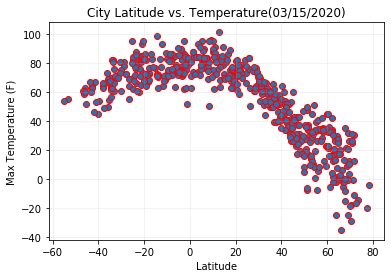

<Figure size 432x288 with 0 Axes>

In [86]:
# Build a scatter plot for each data type
title_date = dates[0]
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker = 'o',
            edgecolor='red', alpha = 1
           )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature({title_date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_MaxTemp.png')

Latitude vs. Humidity

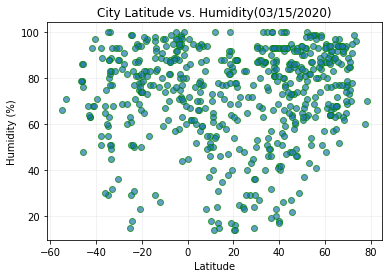

<Figure size 432x288 with 0 Axes>

In [87]:
# Build a scatter plot for each data type
title_date = dates[0]
plt.scatter(weather_data["lat"], weather_data["humid"], 
            edgecolor='green', alpha=.7)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity({title_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_Humidity.png')

Latitude vs. Cloudiness

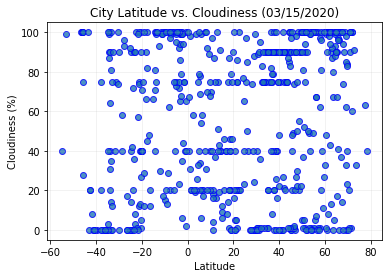

<Figure size 432x288 with 0 Axes>

In [88]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"],
           edgecolor='blue', alpha=.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({title_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_Cloudiness.png')

Latitude vs. Wind Speed

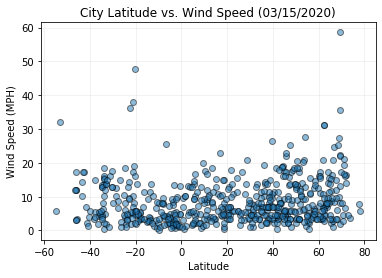

<Figure size 432x288 with 0 Axes>

In [89]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"],
            edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({title_date})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("WinSpeedInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_WindSpeed.png')

# Northern and Southern Hemisphere

In [97]:
# weather_data.head(3)

In [98]:
# Select data for northern and southern
# Use df.loc[df['column_name']=='condition'] to create criteria
# and put into new df
northern_df = weather_data.loc[weather_data["lat"]>=0]
southern_df = weather_data.loc[weather_data["lat"]<0]
# northern_df
# southern_df

# Linear Regression

In [110]:
# Use df.loc[:,'cloumns'] to select specific column
north_temp = northern_df.loc[:,'max_temp']
north_lat = northern_df.loc[:,'lat']
# north_temp
# north_lat
x = north_lat
y = north_temp

# Calculate the linear regression using scipy.stats library
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
print(f'The correlation factor is {round(rvalue,2)}')

The correlation factor is -0.9
